In [1]:
# librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime
from statsmodels.api import OLS, RLM
from statsmodels.formula.api import ols, rlm, wls
import statsmodels.api as sm
import scipy.integrate as si
from pandas import Series, DataFrame

In [2]:
# fecha para nombrar archivos
date = datetime.now()                                            
date = str(date).replace(':', '').replace(' ','_').split('.')[0] # cambio de formato

In [3]:
#sns.set_style('whitegrid')
sns.set(style="ticks", palette="Set2")
sns.despine()

In [4]:
# formato de columnas pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [5]:
%matplotlib inline
%load_ext rpy2.ipython
%precision 3

'%.3f'

In [6]:
info_tramos = {1 : 'Negativas y cero',
               2 : 'De 0,01 a 3.000,00',
               3 : 'De 3.000,01 a 6.000,00',
               4 : 'De 6.000,01 a 12.000,00',
               5 : 'De 12.000,01 a 18.000,00',
               6 : 'De 18.000,01 a 30.000,00',
               7 : 'De 30.000,01 a 60.000,00',
               8 : 'De 60.000,01 a 120.000,00',
               9 : 'De 120.000,01 a 240.000,00',
               10 : 'De 240.000,01 en adelante'}
info_ccaa = pd.read_csv('data/nombres_ccaa.csv').to_dict(orient='record')[0]

In [7]:
%%!

open doc/doc_2014_18.pdf
open .

[]

|![][img7]|
|:--:|

|![metodología muestreo 1][img1]|![metodología muestreo 1][img2]|![metodología muestreo 1][img3]|
|:--:|:--:|:--:|
|![][img4]|![][img5]|![][img6]|


[img1]: doc/1.jpg
[img2]: doc/2.jpg
[img3]: doc/3.jpg
[img4]: doc/4.jpg
[img5]: doc/5.jpg
[img6]: doc/6.jpg
[img7]: doc/0.jpg

VARIANZA DATOS DISCRETOS:

$\sigma_X^2 = ( \sum_{i=1}^n p_i\cdot(x_i - \mu)^2)$
donde

$\mu = ( \sum_{i=1}^n p_i\cdot x_i )$

# DATOS:

In [8]:
data_2010 = 'data/2010/dmuestra.csv'  # muestra de 2010
data_2011 = 'data/2011/dmuestra.csv'  # muestra de 2011

In [19]:
# datos
f = 'data/2011/2011principales.csv'
df = pd.read_csv(f)
df.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,597891,597892,597893,597894,597895,597896,597897,597898,597899,597900,597901,597902,597903,597904,597905,597906,597907,597908,597909,597910,597911,597912,597913,597914,597915,597916,597917,597918,597919,597920,597921,597922,597923,597924,597925,597926,597927,597928,597929,597930,597931,597932,597933,597934,597935,597936,597937,597938,597939,597940
ndecla,5743234,5743235,5743236,5743237,5743238,5743239,5743240,5743241,5743242,5743243,5743244,5743245,5743246,5743247,5743248,5743249,5743250,5743251,5743252,5743253,5743254,5743255,5743256,5743257,5743258,5743259,5743260,5743261,5743262,5743263,5743264,5743265,5743266,5743267,5743268,5743269,5743270,5743271,5743272,5743273,5743274,5743275,5743276,5743277,5743278,5743279,5743280,5743281,5743282,5743283,...,6341125,6341126,6341127,6341128,6341129,6341130,6341131,6341132,6341133,6341134,6341135,6341136,6341137,6341138,6341139,6341140,6341141,6341142,6341143,6341144,6341145,6341146,6341147,6341148,6341149,6341150,6341151,6341152,6341153,6341154,6341155,6341156,6341157,6341158,6341159,6341160,6341161,6341162,6341163,6341164,6341165,6341166,6341167,6341168,6341169,6341170,6341171,6341172,6341173,6341174
nhogar,557846,470524,557847,800417,557849,557850,844810,844811,366390,874225,693565,755941,557851,557852,755942,755943,755944,844812,755945,755946,628324,693566,470525,601590,557855,693567,557856,557857,557858,557859,557860,755947,557861,557862,755948,557863,800418,557864,557865,557866,557867,435277,1903,800419,1904,1905,874226,435278,435279,470526,...,825430,907323,585892,617503,825408,907324,825431,413396,15001727,907325,907326,847747,863770,863771,907327,825432,863772,863766,907328,907329,907330,825433,907272,776512,863773,863774,907332,776487,907333,907334,863775,825434,907331,907335,776515,907336,803671,907337,825435,907338,907339,907339,907318,825436,907340,863776,907341,863748,907275,907317
nppal,1002095917,1002123512,1002136926,1002138304,1002201551,1002210474,1002222245,1002238253,1002239045,1002241005,1002316874,1002322636,1002324327,1002324692,1002324747,1002324957,1002325123,1002325451,1002327164,1002329135,1002329511,1002331342,1002333932,1002335741,1002340851,1002341901,1002343964,1002344627,1002348057,1002350301,1002351631,1002351981,1002354442,1002359585,1002362901,1002364323,1002365966,1002451731,1002452221,1002453363,1002477712,1002500005,1002500016,1002500031,1002500042,1002500086,1002500156,1002500182,1002500403,1002500517,...,56900076926,56900078455,56900078901,56900100424,56900112954,56900125436,56900142752,56900146727,56900155724,56900159412,56900164253,56900176061,56900176105,56900181016,56900190864,56900193211,56900194526,56900195296,56900195952,56900195963,56900197186,56900207627,56900283507,56900343976,56900344002,56900355375,56900485457,56900490707,56900613535,56900639667,56900682787,56900727624,56900797182,56900798987,56900800332,56900800575,56900800671,56900802023,56900803132,56900817961,56900894187,56900894191,56900900616,56900900697,56900902366,56900902381,56900902473,56900902893,56900922316,56900968354
ncyge,28005171063,28039028136,1800828795,0,1002201584,1002210463,0,0,8090708042,22002267443,0,0,1800034472,28053825495,0,0,0,46007152016,0,1800802641,26001000772,11905365265,48801331332,0,0,3002262584,1002474595,0,26001120877,29011702857,32003236791,0,0,1800571147,0,1801430607,0,1800389372,1801200145,0,1800418562,26000735962,26000891852,41014651194,0,24005270097,1900095725,0,1800897701,1801450664,...,0,56900158211,0,56000368267,56000333864,0,0,0,0,0,0,18006105181,0,0,0,0,0,56900031371,0,0,0,0,56000231292,56090067866,0,0,0,56000075855,0,0,0,0,56900283474,0,0,0,17006821087,0,0,0,56900894191,56900894187,56900027587,0,0,56900939116,0,56000388394,56000283707,56090054367
expediente,201110066341636K,201110072331775J,201110031720523R,201110017981270P,201110047050842D,201110059621468W,201110066501731G,201110014371761E,201110

32919.145

# VARIABLES DE INTERÉS

In [10]:
# definimos las variables de interés
data = df.copy()
data['deduc_vh'] = data[['c700', 'c701']].sum(1)
data['cltotal'] = data[['c720', 'c721']].sum(1)
data['citotal'] = data[['c698', 'c699']].sum(1)
vi = ['c1', 'c455', 'c620', 'citotal', 'c732', 'cltotal', 'deduc_vh']
variables_interes = list(zip(np.repeat('factoroptimizado', len(vi)), vi))

In [11]:
# FRECUENCIAS: distribucion de declarantes por tramo y ccaa
pesoij = data.pivot_table(index='tramo',                     # Tramos en filas
                          columns='ccaa',                    # CCCAA en columnas 
                          values='factoroptimizado',         # Valores = factoroptimizado
                          aggfunc='sum')                     # Se representa la suma de valores

# Ordenar de mayor a menor las CCAA
orden_ca = pesoij.sum(axis=0).sort_values(ascending=True).index
dis_peso = pesoij[orden_ca]

# poblacion total
N = data.factoroptimizado.sum()

# frecuencia relativa en %
dis_peso = dis_peso * 100 / N

# frecuencia relativa de tramo
dis_peso_tramo = dis_peso.sum(0)

# frecuencia relativa de ccaa
dis_peso_ca = dis_peso.sum(1)

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


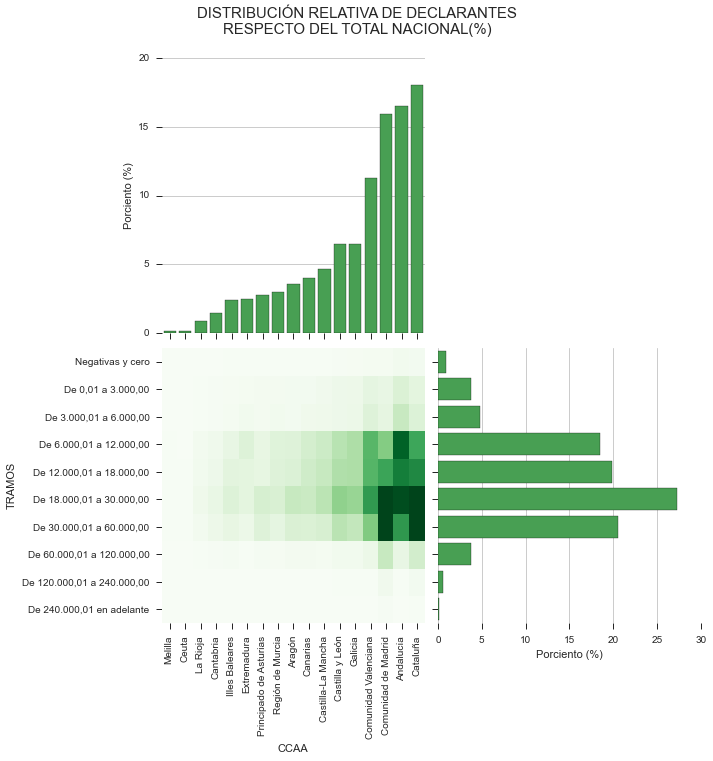

In [23]:
# GRAFICO

# figuras
fs = (10,10)
plt.figure(figsize=fs)
ax1 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)
ax2 = plt.subplot(2,2,1)

# traducir los nombres de ccaa y tramos
dis_peso.index = [info_tramos[i] for i in dis_peso.index]
dis_peso.columns = [info_ccaa[str(c)] for c in dis_peso.columns]

# densidad
sns.heatmap(dis_peso, ax=ax1, cbar=False, cmap='Greens', robust=True)

# barras
g2 = sns.barplot(x=dis_peso_tramo.index, 
                 y=dis_peso_tramo.values, 
                 ax=ax2, 
                 color=sns.xkcd_rgb["medium green"])

g3 = sns.barplot(x=dis_peso_ca, 
                 y=dis_peso.index, 
                 ax=ax3, 
                 orient='horizontal', 
                 color=sns.xkcd_rgb["medium green"])

# estilo
sns.despine(ax=ax2, left=True, bottom=True)
sns.despine(ax=ax3, left=True, bottom=True)

ax2.yaxis.grid(True)
ax2.set_xticklabels('')
ax2.set_xlabel('')
ax2.set_ylabel('Porciento (%)')

ax3.xaxis.grid(True)
ax3.set_yticklabels('')
ax3.set_xlabel('Porciento (%)')

ax1.set_xlabel('CCAA')
ax1.set_ylabel('TRAMOS')

plt.suptitle('DISTRIBUCIÓN RELATIVA DE DECLARANTES \nRESPECTO DEL TOTAL NACIONAL(%)', fontsize=15, y=1.05)

plt.tight_layout()

# guardar grafico
plt.savefig('imgs/dist_%s' % (date), bbox_inches='tight')

In [12]:
# DISTRIBUCIÓN ACUMULADA: LORENTZ(%POBLACION, $)
lc = {}
for v in variables_interes:
    v = list(v)                                 # Para cada par (factor, variable interes) 
    cdf = data[v].copy()                        # creamos la variable funcion de densidad acumulada cdf

    cdf = cdf.sort_values(by=v[1],              # ordenamos la variable monetaria de menor a mayor
                          ascending=True)

    cdf[v[1]] = cdf.product(axis=1)             # variable monetaria a poblacional (W * variable)

    cdf[v] = cdf[v].cumsum(axis=0) / cdf.sum()  # suma acumulada y dividimos por el total para normalizar

    lc[v[1]] = [cdf[v[0]], cdf[v[1]]]           # guardamos el resultado

lc.keys()

dict_keys(['c455', 'deduc_vh', 'cltotal', 'c1', 'citotal', 'c732', 'c620'])

# CURVA DE LORENTZ

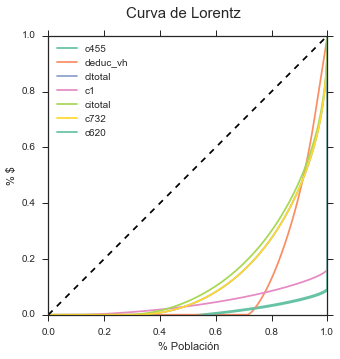

In [13]:
# GRAFÍCO DE CURVA DE LORENTZ
plt.figure(figsize=(5,5))

for k in lc.keys():    
    plt.plot(lc[k][0], lc[k][1], label=k)

plt.plot([0,1], color='black', linestyle='--')
plt.suptitle('Curva de Lorentz', fontsize=15)
plt.xlabel('% Población')
plt.ylabel('% $')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=0)
plt.savefig('imgs/lorentz_%s_%s.png' % ('principales', date), bbox_iches='tight')

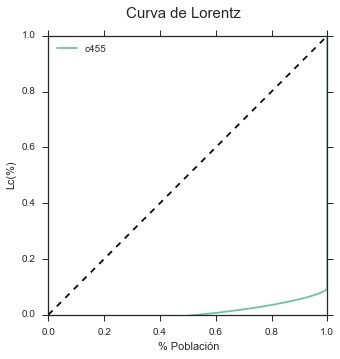

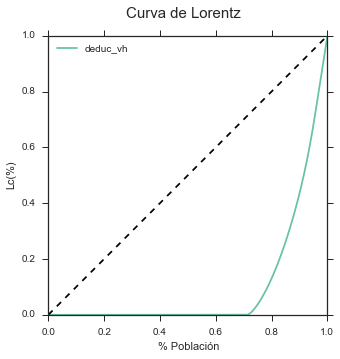

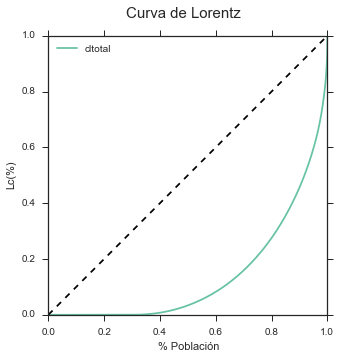

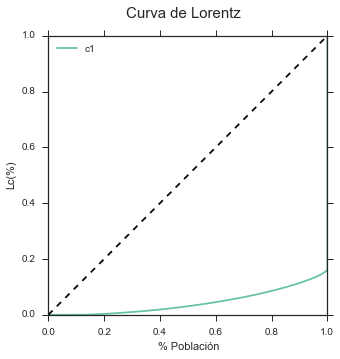

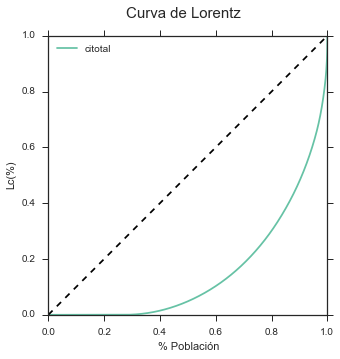

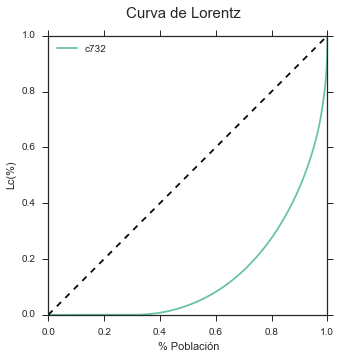

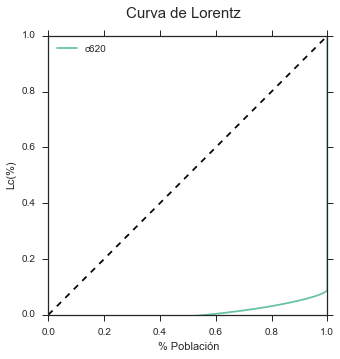

In [14]:
# crear todos los gráficos individuales

for i, k in enumerate(lc.keys()):
    plt.figure(figsize=(5,5))
    ax = plt.subplot(1,1,1)
    ax.plot(lc[k][0], lc[k][1], label=k)
    ax.plot([0,1], color='black', linestyle='--')
    plt.suptitle('Curva de Lorentz', fontsize=15)
    plt.xlabel('% Población')
    plt.ylabel('Lc(%)')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend(loc=0)
    plt.savefig('imgs/lc_%s_%s_%s.png' % ('principales', date, i), bbox_iches='tight')

In [15]:
%%html
    <iframe src="//giphy.com/embed/tsk8suJX4g5yg" width="480" height="480" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="http://giphy.com/gifs/tsk8suJX4g5yg">via GIPHY</a></p>

# GINI

              Gini
citotal   0.697923
cltotal   0.722771
c732      0.722776
deduc_vh  0.798746
c1        0.911051
c455      0.986210
c620      0.991811


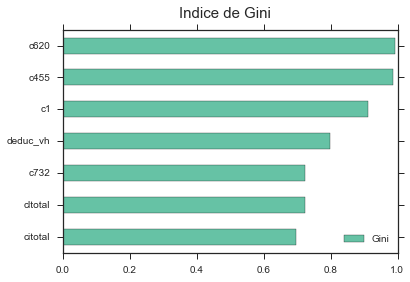

In [16]:
# indice de gini

gini = {}

for k in lc.keys():
    area_total = 0.5
    area_bajo = si.trapz(x=lc[k][0], y=lc[k][1])
    area_entre = area_total - area_bajo
    gini[k] = area_entre / area_total

df_gini = pd.DataFrame.from_dict(gini, orient='index').sort_values(by=0)
df_gini.columns = ['Gini']
df_gini.plot(kind='barh')
plt.suptitle('Indice de Gini', fontsize=15)
plt.savefig('imgs/gini_%s.png' % date, bbbox_inches='tight')

print(df_gini)

#  CURVA DE LORENTZ GENERALIZADA
##  DISTRIBUCIÓN ACUMULADA
###  glc Generalized Lorentz Curve

Nota: Al ordenar la variable monetaria, cambia el orden de los pesos, por lo que ha de calcularse para cada variable.

In [17]:
# DISTRIBUCION GENERALIZADA LC
glc = {}
N_pob = data[v[0]].sum() # total

for v in variables_interes:

    # Para cada par (factor, variable interes) 
    v = list(v)

    # crea la variable: funcion de densidad acumulada
    dis = data[v].copy()
    
    # ordenamos la variable monetaria de menor a mayor
    dis = dis.sort_values(by=v[1], ascending=True)

    # media ponderada
    w_i = dis[v[0]]
    valor_i = dis[v[1]] / 100  # En euros: dividido por 100
    
    ponderado = valor_i * w_i

    # Media será la Suma Acumulada desde 0 a i entre el peso acumulado: ∑ (valor_i * w_i) / ∑ w_i
    dis['weigthed_mean'] = ponderado.cumsum() / w_i.cumsum()
    print('%s weigthed' % v[1])

    dis[v[0]] = dis[v[0]].cumsum(axis=0) * 100 / N_pob  # en porcentaje

    glc[v[1]] = [dis[v[0]].values, dis.weigthed_mean.values]  # guardamos el resultado
    
glc.keys()

c1 weigthed
c455 weigthed
c620 weigthed
citotal weigthed
c732 weigthed
cltotal weigthed
deduc_vh weigthed


dict_keys(['c455', 'deduc_vh', 'cltotal', 'c1', 'citotal', 'c732', 'c620'])

In [18]:
# FUNCION AUXILIAR PARA EL FORMATO EN LOS GRÁFICOS
def form3(x, pos):
    """ This function returns a string with 3 decimal places, given the input x"""
    return '{:,}'.format(x).replace(',', ' ')

formatter = FuncFormatter(form3)

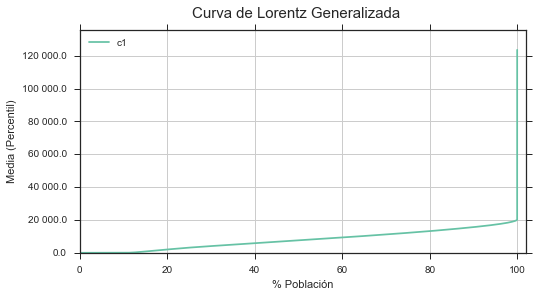

In [72]:
# DIBUJAR LA CURVA DE GLC
plt.figure(figsize=(8,4))

names =['c1']
ymax = 0
ymin = 0
for k in names:
    plt.plot(glc[k][0], glc[k][1], label=k)
    if ymax < max(glc[k][1]):
        ymax = max(glc[k][1])
    if ymin > min(glc[k][1]):
        ymin = min(glc[k][1])
plt.suptitle('Curva de Lorentz Generalizada', fontsize=15)

plt.xlabel('% Población')
plt.ylabel('Media (Percentil)')

plt.xlim(0,102)
plt.ylim(ymin, ymax + ymax*0.1)

plt.legend(loc=0)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatter))
plt.gca().grid(True)

plt.savefig('imgs/generalized_lorentz_%s_%s.png' % ('principales', date), bbox_iches='tight')

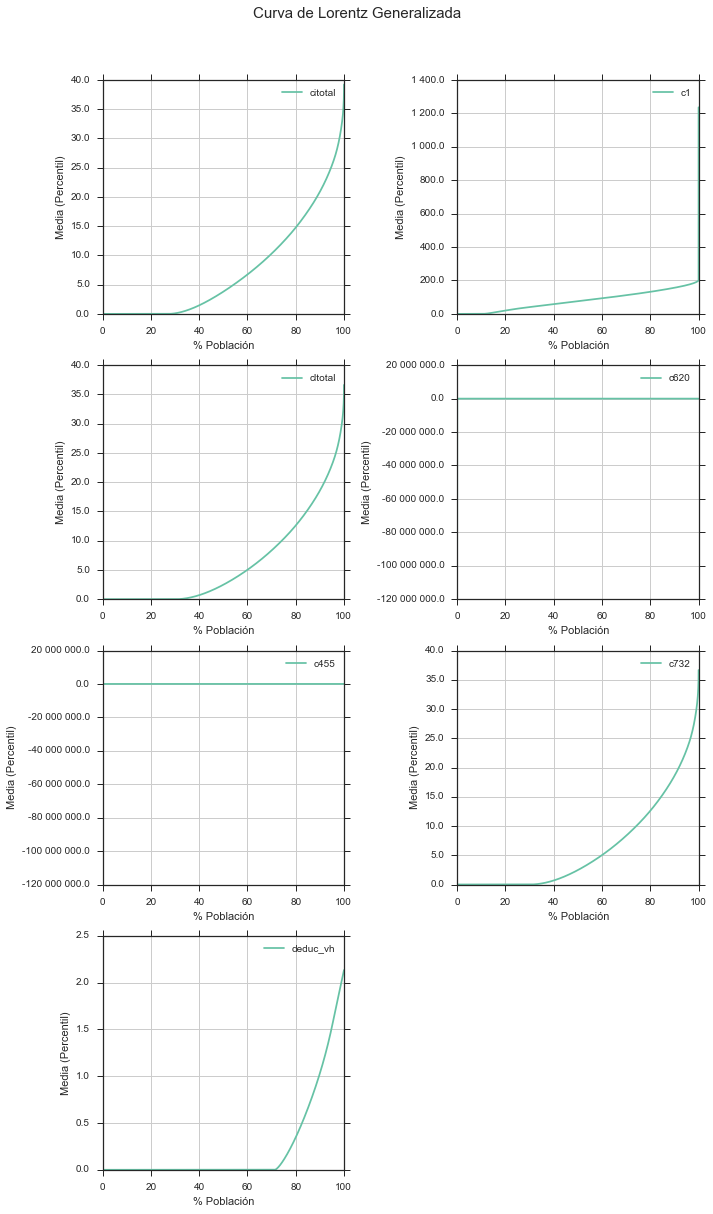

In [79]:
# GLC PARA CADA VARIABLE DE INTERÉS

n = [len(glc) if len(glc) % 2 == 0 else len(glc) + 1][0]
fig = plt.figure(figsize=(10,2*n))

axs = list()
for i, k in enumerate(glc.keys()):
    globals()['ax%s' % (i+1)] = fig.add_subplot(n/2, 2, i+1)
    axs.append(globals()['ax%s' % (i+1)])
    axs[-1].plot(glc[k][0], glc[k][1] / 100, label = k)

plt.suptitle('Curva de Lorentz Generalizada', fontsize=15, y=1.05)

for a in axs:
    a.set_xlabel('% Población')
    a.set_ylabel('Media (Percentil)')
    a.legend(loc=0)
    a.set_xlim(0,100)
    a.yaxis.set_major_formatter(FuncFormatter(formatter))
    a.grid(True)

plt.tight_layout()
plt.savefig('imgs/glc_%s_%s.png' % ('principales', date), bbox_iches='tight')

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/pandas/core/internals.py:1031: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._try_coerce_result(func(values, other))


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


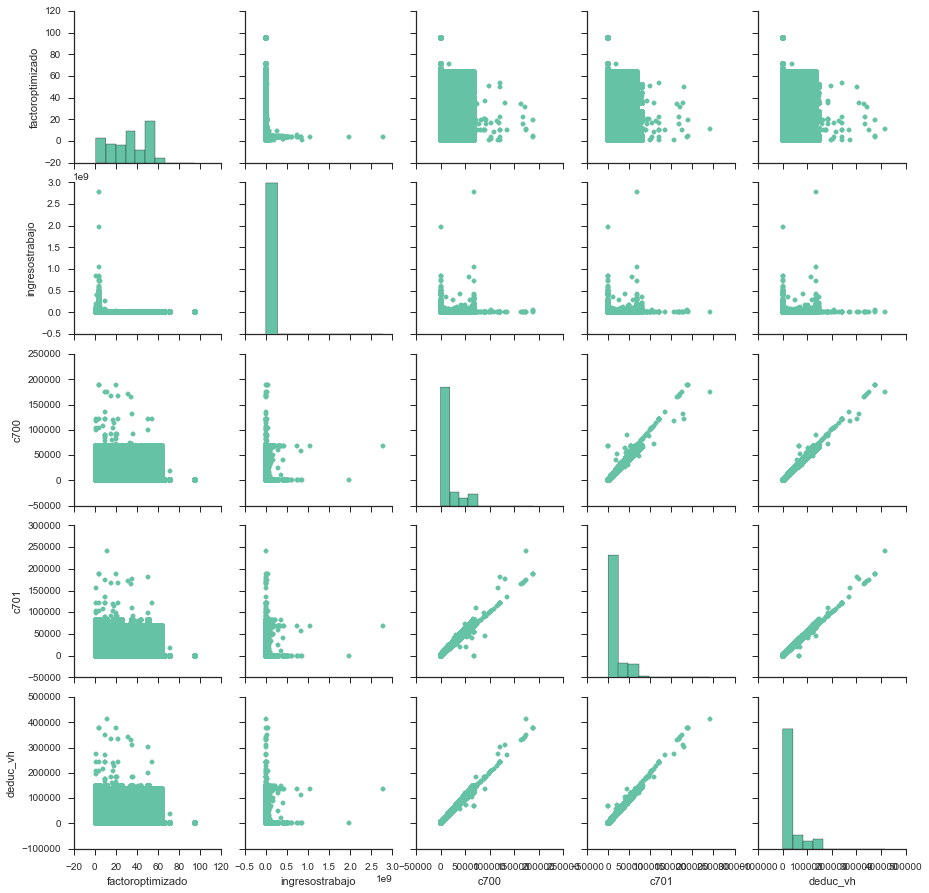

In [84]:
# deduccions por vh
var_descrip = ['factoroptimizado', 'ingresostrabajo', 'ccaa', 'tramo']
var_mon = ['c700', 'c701']

data = df[var_descrip + var_mon].copy()
data[var_descrip[-2:]] = pd.Categorical(data[var_descrip[-2:]])
data['deduc_vh'] = data[var_mon].sum(1)
data.sort_values(by='ingresostrabajo', inplace=True)
sns.pairplot(data)

In [ ]:
sns.

In [45]:
# DATAFRAME DE LAS DISTRIBUCIONES
lc_df = pd.DataFrame.from_dict(lc)
glc_df = pd.DataFrame.from_dict(glc)

# MEDIAS

In [46]:
# DISTRIBUCION MEDIA PONDERADA DE UNA VARIABLE POR CCAA Y TRAMO
variable = 'c680'

data['%s_w' % variable] = data[variable] * data['factoroptimizado']

total = data['factoroptimizado'].sum()

# titulo
ttl = 'Media de %s' % variable

# tabla de valores
valores = data.pivot_table(index='tramo', 
                           columns='ccaa', 
                           values='%s_w' % variable, 
                           aggfunc='sum')

# pasamos los valores de centimos a euros
valores = valores / 100 

# tabla de pesos
w = data.pivot_table(index='tramo', 
                     columns='ccaa', 
                     values='factoroptimizado', 
                     aggfunc='sum')

# si multiplicamos los valores por sus pesos y dividimos por la suma de los pesos
# tenemos las medias ponderadas para cada ccaa y tramo

media_nacional = valores.sum(1).sum() / w.sum(1).sum()
r = valores * w / w

# ordenar los tramos
tramo_names = r.sortlevel(ascending=True).index
tramos = r.sum(1) / w.sum(1)                        # COMPROBAR

# ordenar las ccaa por frecuencia
ccaas = r.sum(0) / w.sum(0)                         # COMPROBAR
ccaas = ccaas.sort_values(ascending=True)
ccaa_names = ccaas.index

# aplicamos el orden en la tabla
r = r[ccaa_names]
r = r.T[tramo_names]
r = r.T

# cambiar los codigos por los nombres de los tramos y ccaa
r.index = [info_tramos[i] for i in r.index]
r.columns = [info_ccaa[str(c)] for c in r.columns]

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


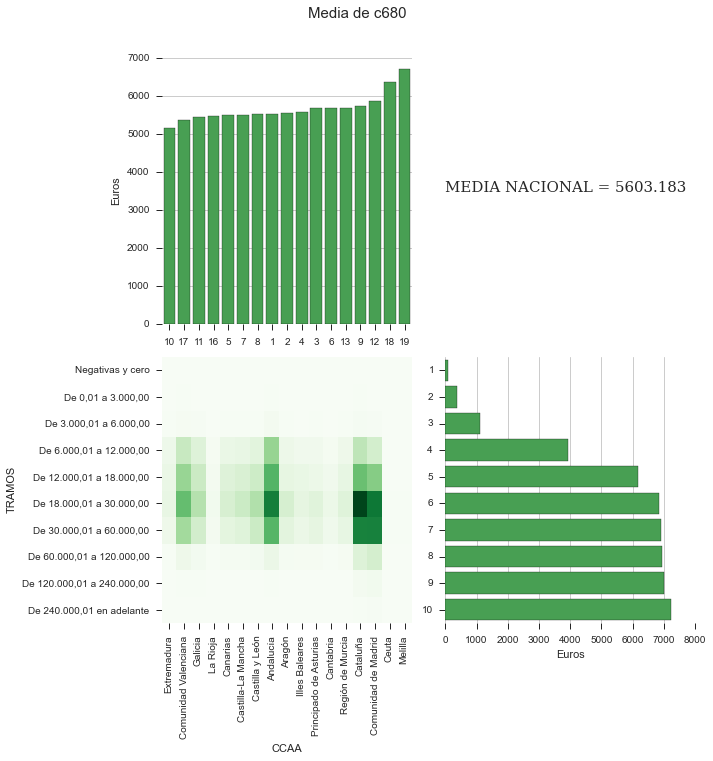

In [59]:
# GRÁFICOS ABSOLUTOS

fs = (10,10)
# subplots
plt.figure(figsize=fs)
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax2.text(0, 0.5,'MEDIA NACIONAL = %.3f' % media_nacional, fontsize=15, family='Serif')
# barras
g1 = sns.barplot(x=ccaas.index, 
                 y=ccaas.values, 
                 ax=ax1, 
                 color=sns.xkcd_rgb["medium green"])#.set_xticklabels('')

g4 = sns.barplot(x=tramos.values, 
                 y=tramos.index, 
                 ax=ax4, 
                 orient='horizontal', 
                 color=sns.xkcd_rgb["medium green"])#.set_yticklabels('')

# densidad
sns.heatmap(data=r, ax=ax3, cbar=False, cmap='Greens', robust=False, annot=False, square=False, fmt='.2f')

# estilo
plt.suptitle(ttl, fontsize=15, y=1.05)

sns.despine(ax=ax1, left=True, bottom=True)
sns.despine(ax=ax4, left=True, bottom=True)
sns.despine(ax=ax2, left=True, bottom=True)

ax1.set_xlabel('')
ax4.set_ylabel('')

ax1.set_ylabel('Euros')
ax4.set_xlabel('Euros')

ax1.yaxis.grid(True)
ax4.xaxis.grid(True)

ax3.set_ylabel('TRAMOS')
ax3.set_xlabel('CCAA')

ax2.tick_params(axis='both', 
                which='both', 
                bottom='off', 
                top='off', 
                labelbottom='off', 
                right='off', 
                left='off', 
                labelleft='off')

# descripción

plt.tight_layout()
plt.savefig('imgs/dist_%s_%s' % (variable, date), bbox_inches='tight')

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


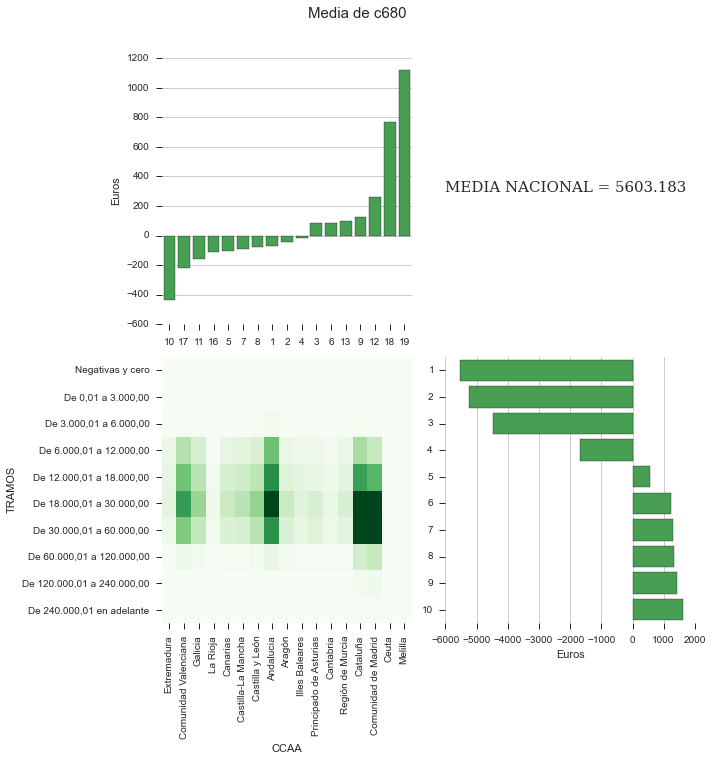

In [58]:
# GRÁFICOS DIFERENCIA RESPECTO DE LA MEDIA NACIONAL
fs = (10,10)
# subplots
plt.figure(figsize=fs)
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax2.text(0, 0.5,'MEDIA NACIONAL = %.3f' % media_nacional, fontsize=15, family='Serif')

# barras
g1 = sns.barplot(x=ccaas.index, 
                 y=ccaas.values-media_nacional, 
                 ax=ax1, 
                 color=sns.xkcd_rgb["medium green"])#.set_xticklabels('')

g4 = sns.barplot(x=tramos.values-media_nacional, 
                 y=tramos.index, 
                 ax=ax4, 
                 orient='horizontal', 
                 color=sns.xkcd_rgb["medium green"])#.set_yticklabels('')

# densidad
sns.heatmap(data=r - media_nacional, ax=ax3, cbar=False, cmap='Greens', robust=True, annot=False, square=False, fmt='.2f')

# estilo
plt.suptitle(ttl, fontsize=15, y=1.05)

sns.despine(ax=ax1, left=True, bottom=True)
sns.despine(ax=ax4, left=True, bottom=True)
sns.despine(ax=ax2, left=True, bottom=True)

ax1.set_xlabel('')
ax4.set_ylabel('')

ax1.set_ylabel('Euros')
ax4.set_xlabel('Euros')

ax1.yaxis.grid(True)
ax4.xaxis.grid(True)

ax3.set_ylabel('TRAMOS')
ax3.set_xlabel('CCAA')

ax2.tick_params(axis='both', 
                which='both', 
                bottom='off', 
                top='off', 
                labelbottom='off', 
                right='off', 
                left='off', 
                labelleft='off')

# descripción

plt.tight_layout()
plt.savefig('imgs/dist_sobre_media_%s_%s' % (variable, date), bbox_inches='tight')

In [61]:
# tabla
np.round(r-media_nacional,2)

,Extremadura,Comunidad Valenciana,Galicia,La Rioja,Canarias,Castilla-La Mancha,Castilla y León,Andalucía,Aragón,Illes Baleares,Principado de Asturias,Cantabria,Región de Murcia,Cataluña,Comunidad de Madrid,Ceuta,Melilla
Negativas y cero,4.431569e+05,1.767796e+06,8.781158e+05,1.764453e+05,6.096321e+05,2.327496e+05,1.962243e+06,2.619940e+06,6.384267e+05,2.990173e+05,1.040447e+06,2.730857e+05,2.151884e+05,2.066395e+06,1.589128e+06,7087.41,21468.74
"De 0,01 a 3.000,00",8.815795e+06,3.654374e+07,2.337302e+07,2.248533e+06,1.208400e+07,1.443836e+07,1.993642e+07,5.087149e+07,9.497315e+06,5.120772e+06,9.225185e+06,4.994224e+06,9.414005e+06,3.969627e+07,2.769370e+07,261035.41,90072.46
"De 3.000,01 a 6.000,00",3.741683e+07,1.279864e+08,8.777976e+07,9.927079e+06,4.615769e+07,5.537634e+07,7.267003e+07,2.150206e+08,3.347387e+07,2.457505e+07,3.079971e+07,1.361321e+07,3.220533e+07,1.541170e+08,1.018106e+08,707526.38,988386.55
"De 6.000,01 a 12.000,00",4.870745e+08,1.759221e+09,1.095642e+09,1.243445e+08,6.534535e+08,7.410895e+08,9.968668e+08,2.903056e+09,5.088421e+08,3.375476e+08,3.538695e+08,1.805825e+08,4.709389e+08,1.997049e+09,1.425160e+09,11802339.55,12553908.56
"De 12.000,01 a 18.000,00",6.519766e+08,2.867884e+09,1.687753e+09,2.058250e+08,1.092960e+09,1.263306e+09,1.602851e+09,4.143528e+09,8.352522e+08,6.786863e+08,5.759044e+08,3.360521e+08,7.878293e+08,3.763064e+09,3.237902e+09,24339003.52,25360710.79
"De 18.000,01 a 30.000,00",7.440211e+08,3.847321e+09,2.232706e+09,3.192066e+08,1.329633e+09,1.670859e+09,2.314224e+09,5.724573e+09,1.344353e+09,8.477679e+08,1.055467e+09,5.561838e+08,1.064564e+09,7.148098e+09,5.918144e+09,56534977.07,60284600.00
"De 30.000,01 a 60.000,00",4.535605e+08,2.626385e+09,1.472153e+09,2.055728e+08,9.469812e+08,1.063321e+09,1.667385e+09,4.089724e+09,9.653807e+08,5.936723e+08,8.580635e+08,4.168031e+08,7.844120e+08,5.622083e+09,5.657777e+09,69394542.06,63886189.53
"De 60.000,01 a 120.000,00",6.363008e+07,4.534574e+08,2.285904e+08,3.371361e+07,1.540359e+08,1.494254e+08,2.405596e+08,6.165411e+08,1.662403e+08,1.189156e+08,1.252802e+08,6.664199e+07,1.154243e+08,1.136870e+09,1.423721e+09,10267944.86,10995901.01
"De 120.000,01 a 240.000,00",5.618186e+06,6.259675e+07,2.871089e+07,4.014716e+06,2.089230e+07,1.597269e+07,2.653763e+07,6.478740e+07,1.879794e+07,1.956450e+07,1.263349e+07,8.702752e+06,1.409309e+07,1.970273e+08,2.810467e+08,1076682.80,1080518.65
"De 240.000,01 en adelante",7.148969e+05,1.412879e+07,7.018299e+06,1.110727e+06,4.449448e+06,1.939334e+06,4.516866e+06,1.220668e+07,3.993223e+06,4.174555e+06,2.604348e+06,1.857204e+06,2.815645e+06,4.891023e+07,9.171067e+07,331606.60,285802.72


# MCO



In [114]:

n_ca = 1
d = df[df['ccaa'] == n_ca]
stats_680 = sm.stats.DescrStatsW(d.c721, weights=d.factoroptimizado)

stats_680.mean/100

np.average(df.c680, weights=df.factoroptimizado)/100

sum(df.c680 * df.factoroptimizado) / df.factoroptimizado.sum() / 100

In [122]:
f = 'c721 ~ C(ccaa) - 1'
m = wls(f, weights = df.factoroptimizado, data = df).fit()
print(m.summary())

                            WLS Regression Results                            
Dep. Variable:                   c721   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     141.3
Date:                mar, 17 nov 2015   Prob (F-statistic):               0.00
Time:                        22:28:58   Log-Likelihood:            -9.1284e+06
No. Observations:              597941   AIC:                         1.826e+07
Df Residuals:                  597924   BIC:                         1.826e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
C(ccaa)[1]   1.391e+05   2798.333     49.695      

In [123]:
sm.stats.diagnostic.het_white(m.resid, m.model.exog)

(18.517, 0.295, 1.157, 0.295)

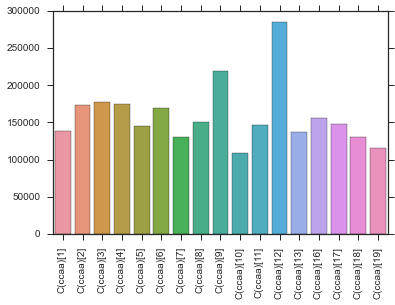

In [126]:
g = sns.barplot(m.model.exog_names, m.params)
ax = plt.gca()
gg = plt.setp(ax.get_xticklabels(), rotation=90)
plt.suptitle('')